In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from typing import List
from enum import Enum
from collections import Counter
from tqdm import tqdm
from pyod.models.copod import COPOD
from wordle_solver import WordleSimulation, reduce_word_bank
%matplotlib inline
pd.set_option('display.max_columns', None)

#### Util functions

In [2]:
def read_word_list(file_name:str):
    
    result = []
    with open(file_name) as fp:
        result.extend([word.strip() for word in fp.readlines()])
        
    return result

In [3]:
# Read in word lists
possible_words_list = read_word_list("possible_answers.txt")
accepted_words_list = read_word_list("accepted_words.txt")

In [4]:
new_words = reduce_word_bank("craft",['yellow','grey','yellow','grey','green'], possible_words_list)
new_words

['ascot', 'eclat', 'tacit', 'yacht']

In [51]:
#new_words = reduce_word_bank("enact",['grey','grey','yellow','yellow','green'],new_words)

In [52]:
#reduce_word_bank("coast",['yellow','grey','yellow','grey','green'],new_words)

['caput', 'tacit', 'yacht']

#### Run simulation

In [5]:
simulation_data = pd.DataFrame()

for word in tqdm(possible_words_list):
    
    num_guesses = WordleSimulation(word, possible_words_list, first_guess='saint').run_simulation()
       
    tmp_sim_data = pd.DataFrame({"Guesses":num_guesses}, index=[word])
    simulation_data = pd.concat([simulation_data, tmp_sim_data])
    
simulation_data

100%|███████████████████████████████████████| 2315/2315 [15:44<00:00,  2.45it/s]


,Guesses
aback,3
abase,3
abate,2
abbey,2
abbot,4
...,...
young,3
youth,5
zebra,3
zesty,3


In [6]:
simulation_data['Guesses'].describe()

count    2315.000000
mean        3.535637
std         1.176295
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: Guesses, dtype: float64

<AxesSubplot:xlabel='Guesses', ylabel='Probability'>

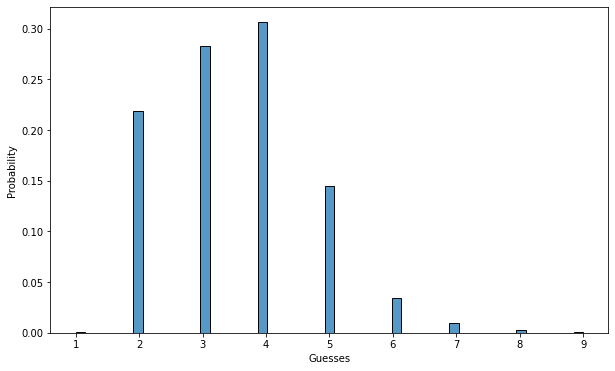

In [7]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(simulation_data['Guesses'],stat='probability')

In [8]:
def empirical_cdf(x:float, data:np.ndarray):
    
    return np.mean(data <= x)

inputs = list(range(1,9))
cdf_vals = [empirical_cdf(x , simulation_data['Guesses'].values) for x in inputs]

Text(0, 0.5, 'CDF')

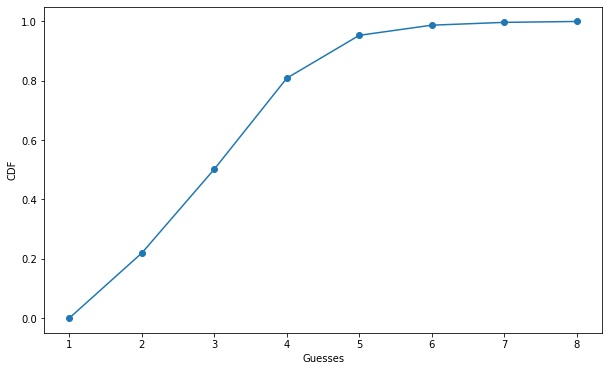

In [9]:
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(inputs, cdf_vals)
ax.plot(inputs, cdf_vals)
ax.set_xlabel('Guesses')
ax.set_ylabel('CDF')